<a href="https://colab.research.google.com/github/neha702/Sparks-Foundation-tasks/blob/master/Sparks_Foundation_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 3: To Explore Unsupervised machine learning**

In this task,'iris' dataset is given, and we are expected to find the optimum number of clusters and represent it visually.

**Importing libraries**

In [22]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

**Importing and preparing data**

In [38]:
#importing dataset
datas=pd.read_csv('Iris.csv')
X=datas.iloc[:,1:4].values
datas.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


**Visualisation of data**

Text(0.5, 1.0, 'PetalWidthCm versus SepalLengthCm\t')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


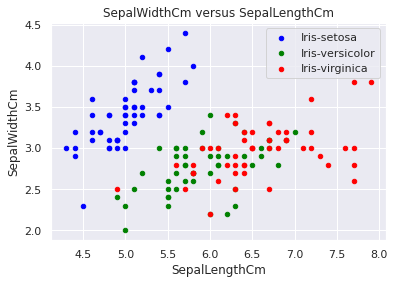

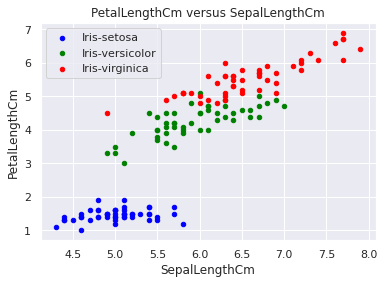

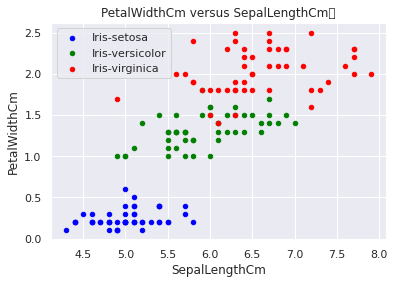

In [39]:
ax1 = datas[datas.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='blue', label='Iris-setosa')
datas[datas.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris-versicolor', ax=ax1)
datas[datas.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='red', label='Iris-virginica', ax=ax1)
ax1.set_title("SepalWidthCm versus SepalLengthCm")
ax2 = datas[datas.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='PetalLengthCm', 
                                                    color='blue', label='Iris-setosa')
datas[datas.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='PetalLengthCm', 
                                                color='green', label='Iris-versicolor', ax=ax2)
datas[datas.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='PetalLengthCm', 
                                                color='red', label='Iris-virginica', ax=ax2)
ax2.set_title("PetalLengthCm versus SepalLengthCm")
ax3 = datas[datas.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='PetalWidthCm', 
                                                    color='blue', label='Iris-setosa')
datas[datas.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='PetalWidthCm', 
                                                color='green', label='Iris-versicolor', ax=ax3)
datas[datas.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='PetalWidthCm', 
                                                color='red', label='Iris-virginica', ax=ax3)
ax3.set_title("PetalWidthCm versus SepalLengthCm	")


**Using elbow method to find optimal number of clusters**

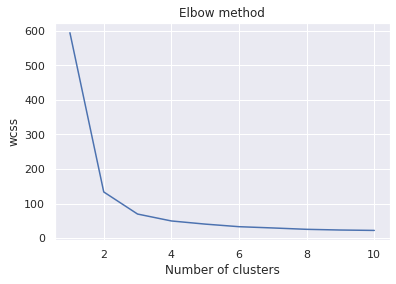

In [40]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

From the above graph, it can be observed that the elbow position gives us the optimal number of clusters which for this dataset is **3**.

**Applying K-means**

In [41]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

**Visualising clusters**

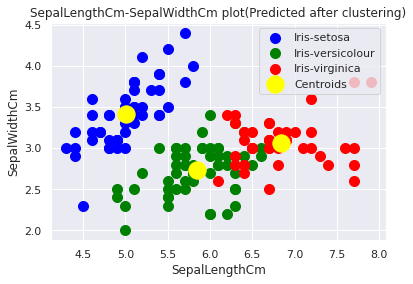

Text(0.5, 1.0, 'SepalLengthCm-SepalWidthCm plot(Actual)')

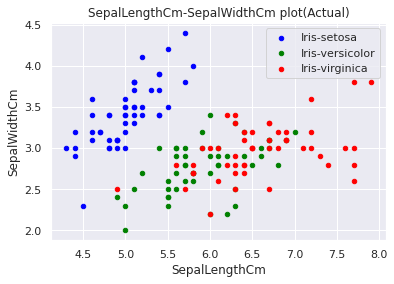

In [46]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='green',label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='red',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('SepalLengthCm-SepalWidthCm plot(Predicted after clustering)')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()
ax4= datas[datas.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='blue', label='Iris-setosa')
datas[datas.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris-versicolor', ax=ax4)
datas[datas.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='red', label='Iris-virginica', ax=ax4)
ax4.set_title("SepalLengthCm-SepalWidthCm plot(Actual)")


**CONCLUSION :** I visually represented the plots  and the optimum numbers of clusters so obtained is 3 using k-means clustering.